# Notebook to compare predictions from different formation channels


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

# Use latex for text rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) #ignore divide by zero warnings

### Load the data 

First the results from this work

Next results from different papers, extracted using WebPlotDigitizer, 

including: 
- Globular cluster results [Antonini et al 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.522..466A)
- POP III star results []()


In [42]:
##########################################
# Results from this work:
# marginals inferred from the LIGO/Virgo data (= observed)
# M1 data
observed_m1 = h5py.File('../data/Marginal_m1.h5', 'r')
observed_m1_cutMc = h5py.File('../data/Marginal_m1_cutMc.h5', 'r')

# q distribution
observed_q = h5py.File('../data/marginal_q_data.h5', 'r')
observed_q_cutMc = h5py.File('../data/marginal_q_data_cutMc.h5', 'r')

# chi_effective distribution
observed_chi_eff = h5py.File('../data/marginal_chieff_data.h5', 'r')
observed_chi_eff_cutMc = h5py.File('../data/marginal_chieff_data_cutMc.h5', 'r')
print(observed_chi_eff_cutMc.keys()) # Note that y-values are m dR/dm

##############
# Antonini et al 2023
Antonini23 = pd.read_csv('../data/Figures_to_Scrape/Antonini23.csv', header=1)
# display(Antonini23)

antonini23_excl_hierarchical = Antonini23[['M1','logdR_dm','q','logdR_dq']]
antonini23_incl_hierarchical = Antonini23[['M1.1','logdR_dm.1','q.1','logdR_dq.1']]


<KeysViewHDF5 ['chi_eff', 'y10', 'y50', 'y90']>


## Primary mass comparison

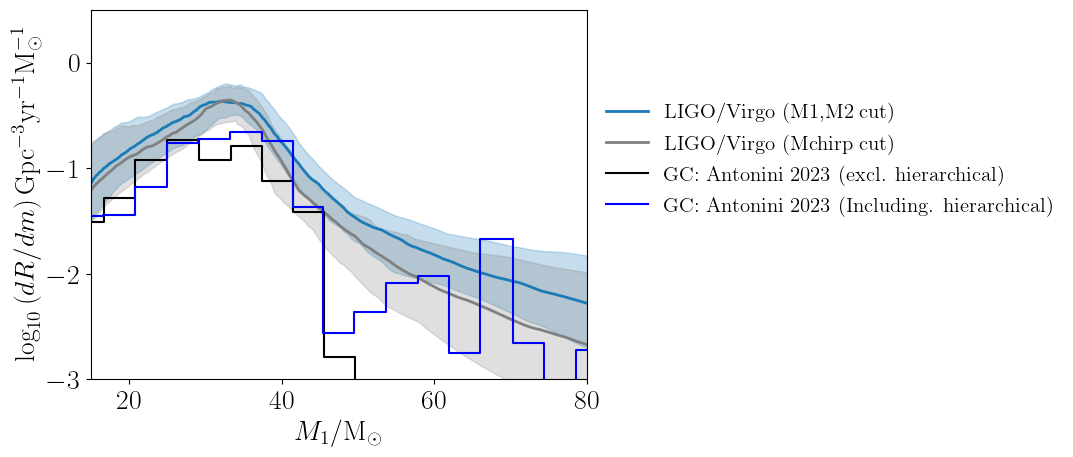

In [37]:
###########
# GW data (observed)
plt.plot(observed_m1['m1'][()], np.log10(observed_m1['y50'][()]/observed_m1['m1'][()]),
         label='LIGO/Virgo (M1,M2 cut)', color='#1A7BB7', lw=2)
plt.fill_between( observed_m1['m1'][()], 
                np.log10(observed_m1['y10'][()]/observed_m1['m1'][()]), 
                np.log10(observed_m1['y90'][()]/observed_m1['m1'][()]),
                alpha=0.25, color='#1A7BB7', label=None)
# with Mchirp cut
plt.plot(observed_m1_cutMc['m1'][()], np.log10(observed_m1_cutMc['y50'][()]/observed_m1_cutMc['m1'][()]),
         label='LIGO/Virgo (Mchirp cut)', color='grey', lw=2)
plt.fill_between( observed_m1_cutMc['m1'][()], 
                np.log10(observed_m1_cutMc['y10'][()]/observed_m1_cutMc['m1'][()]), 
                np.log10(observed_m1_cutMc['y90'][()]/observed_m1_cutMc['m1'][()]),
                alpha=0.25, color='grey', label=None)



###########
# Globular cluster predictions
plt.step(antonini23_excl_hierarchical['M1'], antonini23_excl_hierarchical['logdR_dm'], 
            where = 'mid', label='GC: Antonini 2023 (excl. hierarchical)', color='k')

plt.step(antonini23_incl_hierarchical['M1.1'], antonini23_incl_hierarchical['logdR_dm.1'],
         where = 'mid', label='GC: Antonini 2023 (Including. hierarchical)', color='blue')


###########
# plot values
plt.legend(fontsize=15, bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False) 

plt.xlabel(r'$M_1$/M$_\odot$', fontsize=20)
plt.ylabel(r'$\log_{10} \left(d R/dm \right) \mathrm{Gpc^{-3}yr^{-1} M_{\odot}^{-1} }$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlim(15,80)
plt.ylim(-3, 0.5)

plt.savefig('../figures/Compare_m1_formation.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Mass ratio comparison

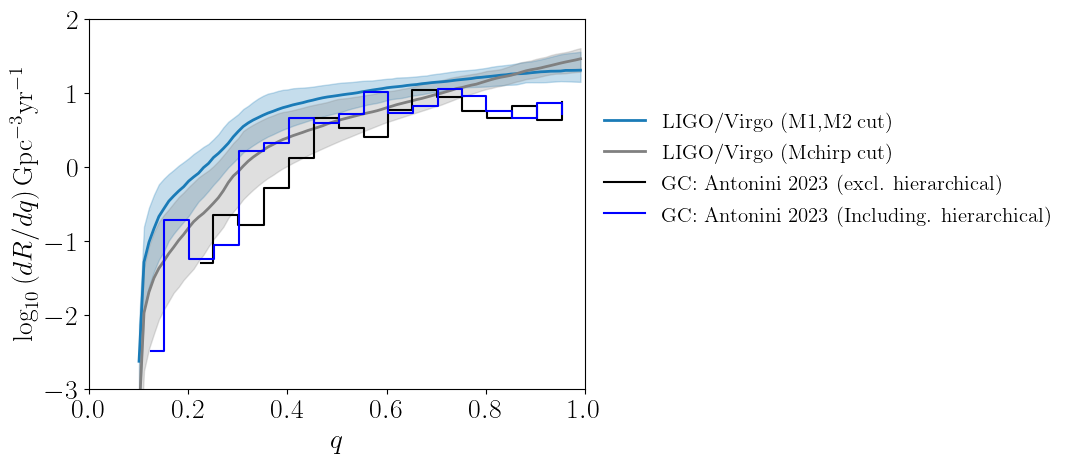

In [50]:
###########
# GW data (observed)
plt.plot(observed_q['q'][()], np.log10(observed_q['y50'][()]),
         label='LIGO/Virgo (M1,M2 cut)', color='#1A7BB7', lw=2)
plt.fill_between(observed_q['q'][()], 
                np.log10(observed_q['y10'][()]), 
                np.log10(observed_q['y90'][()]),
                alpha=0.25, color='#1A7BB7', label=None)
# with Mchirp cut
plt.plot(observed_q_cutMc['q'][()], np.log10(observed_q_cutMc['y50'][()]),
         label='LIGO/Virgo (Mchirp cut)', color='grey', lw=2)
plt.fill_between(observed_q_cutMc['q'][()], 
                np.log10(observed_q_cutMc['y10'][()]), 
                np.log10(observed_q_cutMc['y90'][()]),
                alpha=0.25, color='grey', label=None)


###########
# Globular cluster predictions            
plt.step(antonini23_excl_hierarchical['q'], antonini23_excl_hierarchical['logdR_dq'], 
            where = 'mid', label='GC: Antonini 2023 (excl. hierarchical)', color='k')

plt.step(antonini23_incl_hierarchical['q.1'], antonini23_incl_hierarchical['logdR_dq.1'],
         where = 'mid', label='GC: Antonini 2023 (Including. hierarchical)', color='blue')

###########
# plot values
plt.legend(fontsize=15, bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False) 

plt.xlabel(r'$q$', fontsize=20)
plt.ylabel(r'$\log_{10} \left(d R/dq \right) \mathrm{Gpc^{-3}yr^{-1}}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlim(0,1)
plt.ylim(-3, 2)

plt.savefig('../figures/Compare_q_formation.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Spins ($\chi_{eff}$)

Because there are no clear simulated predictions in the literature, we resort to analytical expectations

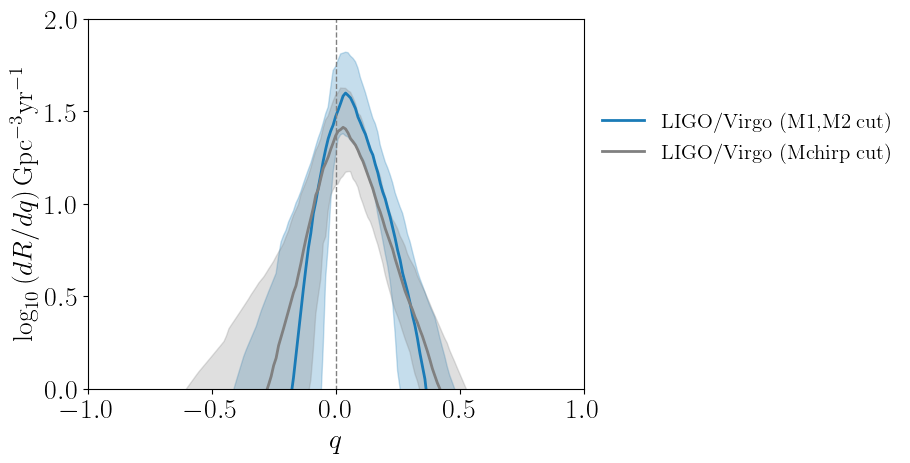

In [51]:
###########
# GW data (observed)
plt.plot(observed_chi_eff['chi_eff'][()], np.log10(observed_chi_eff['y50'][()]),
         label='LIGO/Virgo (M1,M2 cut)', color='#1A7BB7', lw=2)
plt.fill_between(observed_chi_eff['chi_eff'][()], 
                np.log10(observed_chi_eff['y10'][()]), 
                np.log10(observed_chi_eff['y90'][()]),
                alpha=0.25, color='#1A7BB7', label=None)
# with Mchirp cut
plt.plot(observed_chi_eff_cutMc['chi_eff'][()], np.log10(observed_chi_eff_cutMc['y50'][()]),
         label='LIGO/Virgo (Mchirp cut)', color='grey', lw=2)
plt.fill_between(observed_chi_eff_cutMc['chi_eff'][()], 
                np.log10(observed_chi_eff_cutMc['y10'][()]), 
                np.log10(observed_chi_eff_cutMc['y90'][()]),
                alpha=0.25, color='grey', label=None)

plt.vlines(x=0, ymin=-3, ymax=2, color='grey', lw=1, ls='--')

###########
# Globular cluster predictions            





###########
# plot values
plt.legend(fontsize=15, bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False) 

plt.xlabel(r'$q$', fontsize=20)
plt.ylabel(r'$\log_{10} \left(d R/dq \right) \mathrm{Gpc^{-3}yr^{-1}}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlim(-1,1)
plt.ylim(0, 2)

plt.savefig('../figures/Compare_chi_eff_formation.pdf', bbox_inches='tight', dpi=300)
plt.show()